In [1]:
!pip install -q japanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6


In [3]:
df = pd.read_csv('/content/drive/MyDrive/hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [4]:
# 数値型のデータのみ取得
df_numeric = df.select_dtypes(include='number')
df_numeric.head(3)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,50,4,4,4,4,3,4,4,4,4,4
1,35,4,5,4,4,1,1,5,4,1,2
2,22,1,1,1,4,1,5,1,3,1,3


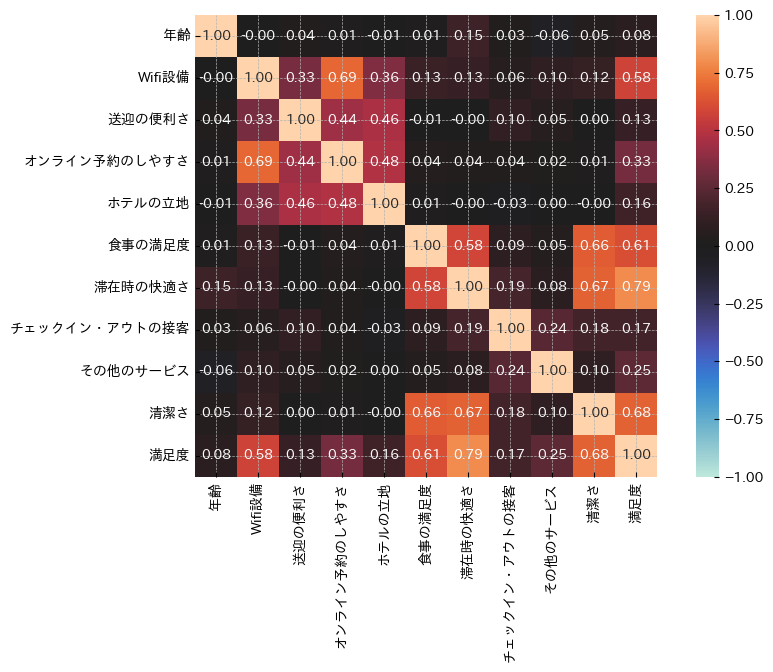

In [5]:
# 相関の確認
sns.heatmap(df_numeric.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [6]:
# 不要カラムの削除
data = df_numeric.drop(['年齢', '満足度'], axis=1)
data.head(3)

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
0,4,4,4,4,3,4,4,4,4
1,4,5,4,4,1,1,5,4,1
2,1,1,1,4,1,5,1,3,1


In [7]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [8]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head(3)

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
0,0.949620,0.604184,0.870686,0.793117,-0.151073,0.426398,0.559565,0.302711,0.548147
1,0.949620,1.278798,0.870686,0.793117,-1.658784,-1.852588,1.352038,0.302711,-1.741841
2,-1.452454,-1.419657,-1.383031,0.793117,-1.658784,1.186060,-1.817854,-0.552888,-1.741841


In [9]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0)

In [10]:
#主成分分析の実行
feature = pca.fit_transform(data_scaled)


In [11]:
# 寄与率
variance_ratio = pca.explained_variance_ratio_

pd.DataFrame(
    variance_ratio,
    index=[f'PC{x+1}' for x in range(len(variance_ratio))],
    columns=['寄与率']
)

,寄与率
PC1,0.282956
PC2,0.246645
PC3,0.131742
PC4,0.088608
PC5,0.081852
PC6,0.057499
PC7,0.045672
PC8,0.033759
PC9,0.031266


In [12]:
# 主成分負荷量
factor_loading = pca.components_ * np.c_[np.sqrt(pca.explained_variance_)]

df_factor_loading = pd.DataFrame(
    factor_loading,
    index=[f'PC{x+1}' for x in range(len(factor_loading))],
    columns=data.columns
)
df_factor_loading.head(3)

,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ
PC1,-0.679850,-0.497788,-0.643415,-0.502943,-0.581518,-0.593762,-0.270364,-0.193775,-0.607104
PC2,0.407609,0.504640,0.571149,0.537421,-0.591292,-0.614555,-0.181945,-0.083744,-0.645571
PC3,0.021599,-0.085695,0.071509,0.125734,0.221923,0.102413,-0.710102,-0.761816,0.112785


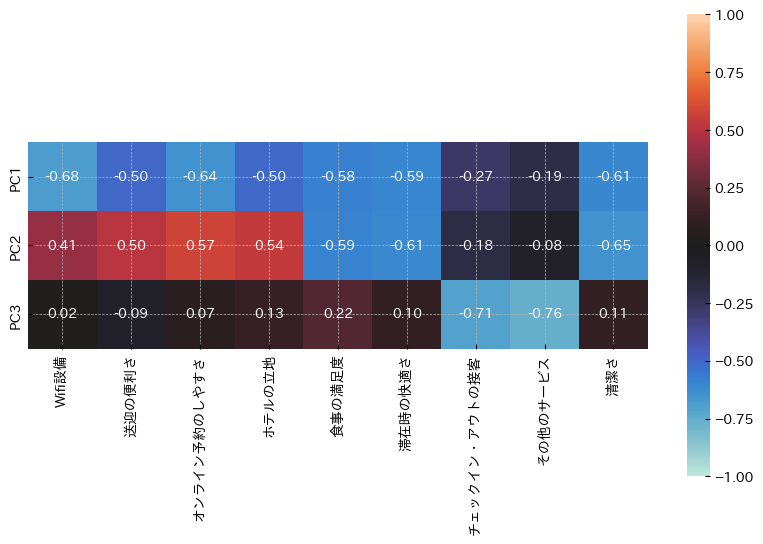

In [13]:
# 可視化して確認
sns.heatmap(df_factor_loading.head(3), vmax=1.0, center=0.0, vmin=-1.0, square=True, annot=True, fmt='.2f');

In [14]:
# 主成分得点でプロットする
def feature_plot(x=1, y=2):
    plt.figure(figsize=(6, 6))
    plt.title(f'第{x}, 第{y}主成分得点のプロット')
    plt.scatter(feature[:, x-1], feature[:, y-1], alpha=0.8, c=list(df.iloc[:, -1]))
    plt.xlabel(f'PC{x}')
    plt.ylabel(f'PC{y}')
    plt.colorbar()
    plt.show()

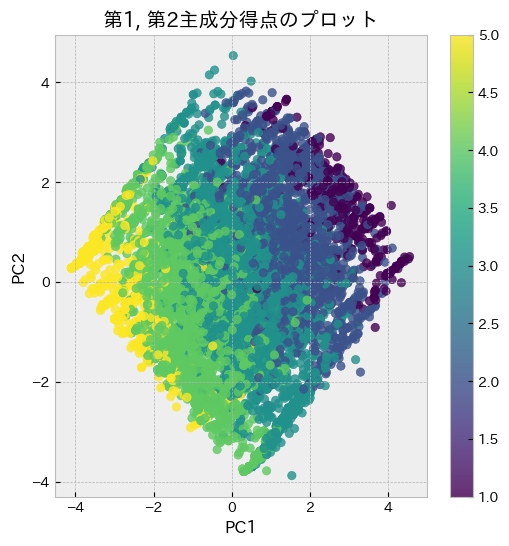

In [15]:
feature_plot(1, 2)

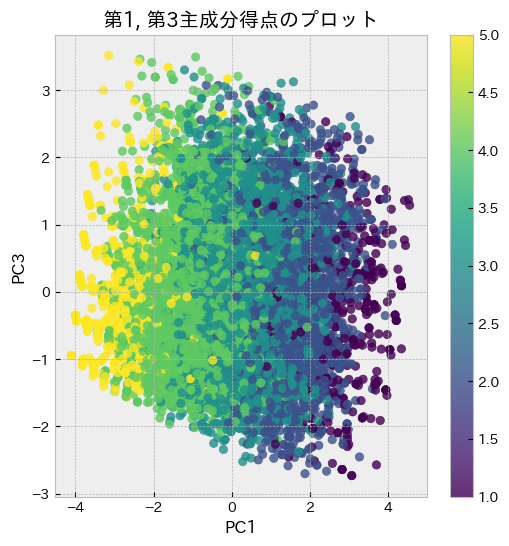

In [16]:
feature_plot(1, 3)

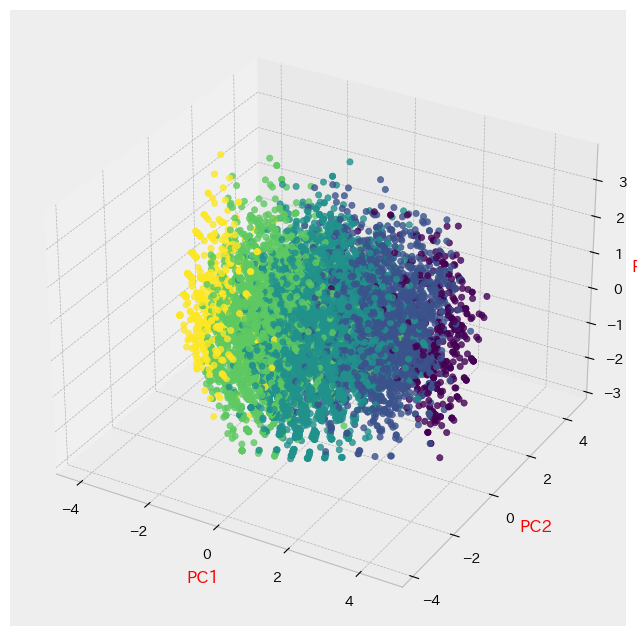

In [17]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1', c='r')
ax.set_ylabel('PC2', c='r')
ax.set_zlabel('PC3', c='r')
ax.scatter(feature[:, 0], feature[:, 1], feature[:, 2], alpha=0.8, c=list(df.iloc[:, -1]))
plt.show();

In [18]:
# 各主成分をDataFrame型で取得
_df_feature = pd.DataFrame(feature[:, :3] , columns=['総合評価', 'ホテルの環境評価', '接客の評価'])
_df_feature.head(3)

,総合評価,ホテルの環境評価,接客の評価
0,-1.637654,0.645483,-0.390539
1,0.286120,3.307718,-1.719181
2,2.570091,0.054585,1.248974


In [19]:
# 元のデータと結合
df_new = pd.concat([df, _df_feature], axis=1)
df_new.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,総合評価,ホテルの環境評価,接客の評価
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4,-1.637654,0.645483,-0.390539
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2,0.286120,3.307718,-1.719181
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3,2.570091,0.054585,1.248974
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3,-0.985539,0.149397,-0.283761
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4,-1.121424,-0.404443,-0.405535


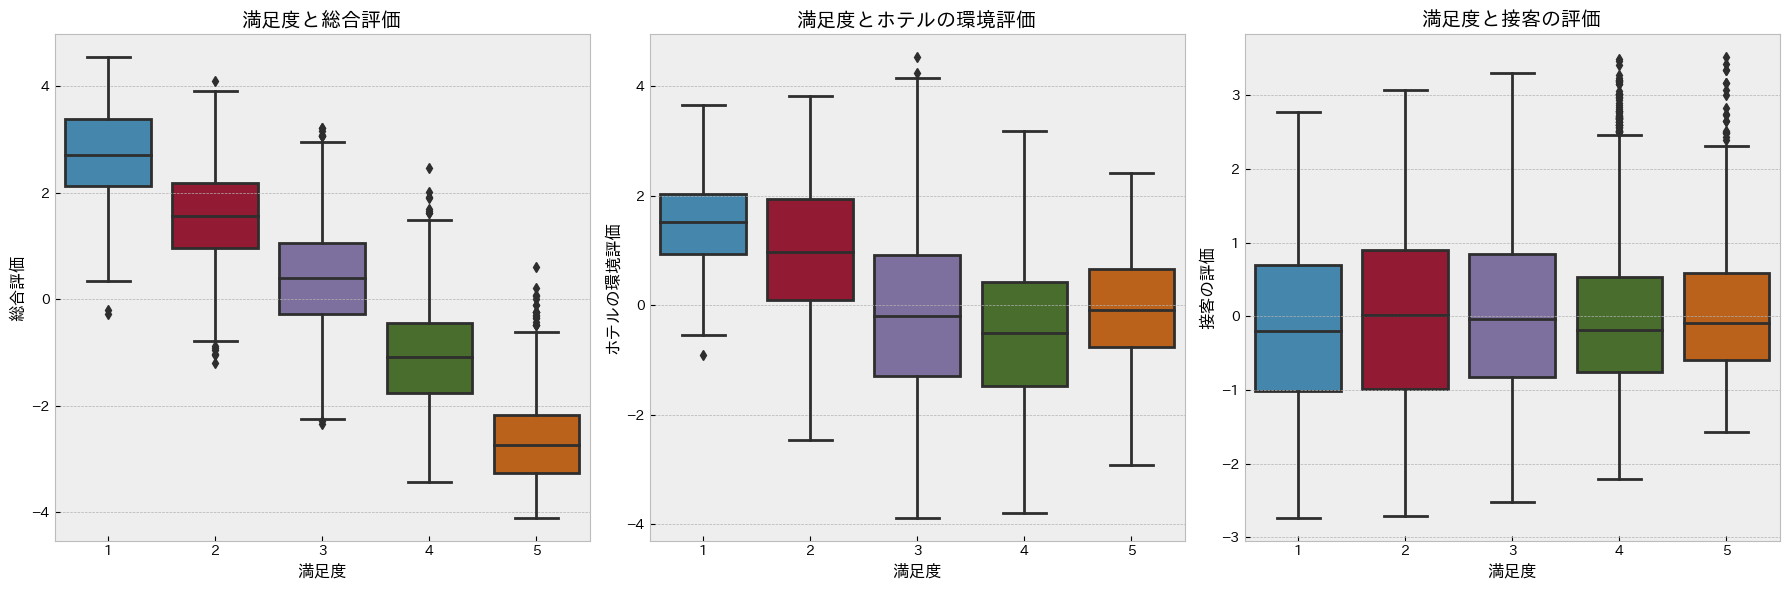

In [20]:
# 満足度別に箱ひげ図で可視化
plt.rcParams['figure.figsize'] = 18, 6
plt.subplot(1, 3, 1)
plt.title('満足度と総合評価')
sns.boxplot(x='満足度', y='総合評価', data=df_new)
plt.subplot(1, 3, 2)
plt.title('満足度とホテルの環境評価')
sns.boxplot(x='満足度', y='ホテルの環境評価', data=df_new)
plt.subplot(1, 3, 3)
plt.title('満足度と接客の評価')
sns.boxplot(x='満足度', y='接客の評価', data=df_new)
plt.tight_layout();

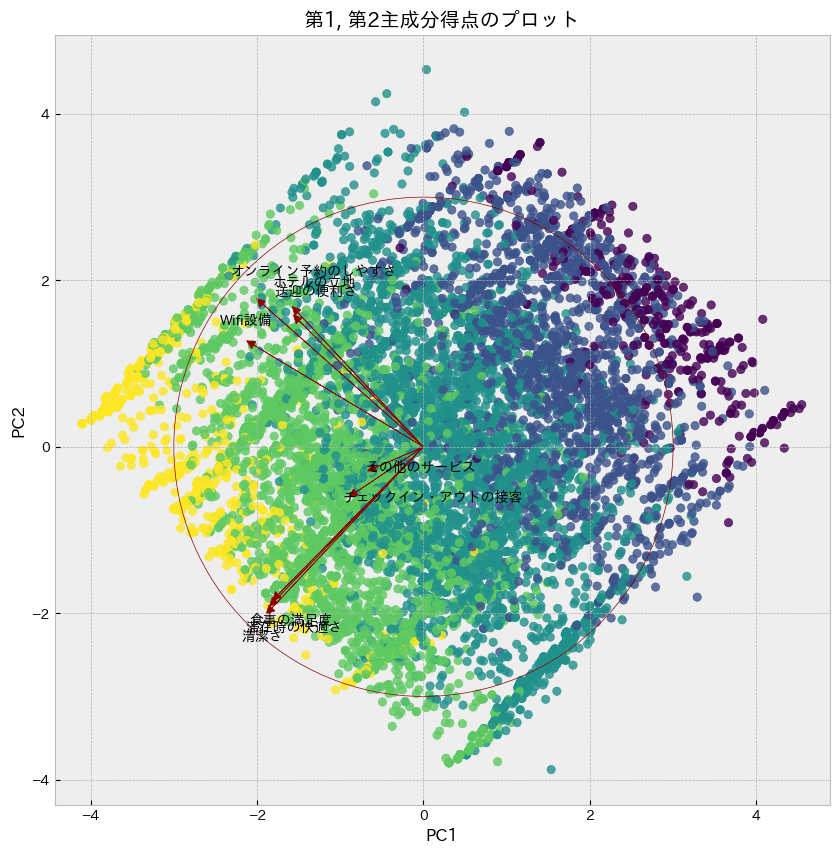

In [21]:
import matplotlib.patches as patches

# 主成分得点プロット
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.title(f'第1, 第2主成分得点のプロット')
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, -1]))
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')

# 主成分負荷量を図示
pc1 = factor_loading[0] # 第一主成分の主成分負荷量
pc2 = factor_loading[1] # 第二主成分の主成分負荷量
arrow_magnification = 3 # 矢印の倍率
feature_names = data.columns.to_list() # カラム名の取得  

# ガイド円
patch_circle = patches.Circle(
    xy=(0, 0), # ガイド円の中心の設定
    radius=1 * arrow_magnification, # 半径の設定  
    ec='darkred', # 円の色  
    fill=False # 円内の塗りつぶし  
    )

# ガイド円をグラフ上に追加
ax.add_patch(patch_circle)

# 矢印と変数ラベルの追加
for i in range(len(feature_names)):
  # 矢印の表示と設定
  ax.arrow(0, 0, # 矢印の中心の設定
           pc1[i] * arrow_magnification, # 矢印の長さの設定
           pc2[i] * arrow_magnification, # 矢印の長さの設定
           head_width=0.1, # 矢印の頭の設定
           head_length=0.1, # 矢印の頭の設定
          color='darkred' # 矢印の色
          )
  # 変数ラベル
  ax.text(pc1[i] * arrow_magnification * 1.2,
          pc2[i] * arrow_magnification * 1.2,
          feature_names[i])

plt.axis('equal')
plt.show()
